<a href="https://colab.research.google.com/github/vbamil/advanced_regression/blob/main/Ridge_and_Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Let's import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Model to predict the sales given the spend on marketing
data = {'Marketing Spend( Million $)' : [23 , 26, 30 , 34 , 43 , 48], 
        'Sales (Million $)': [651 , 762 , 856 ,1063 , 1190 , 1298]}
data = pd.DataFrame(data)
data

,Marketing Spend( Million $),Sales (Million $)
0,23,651
1,26,762
2,30,856
3,34,1063
4,43,1190
5,48,1298


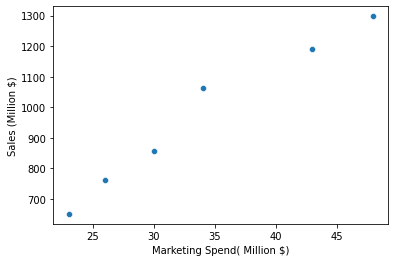

In [3]:
# Plotting a scatter plot to visualize the data
sns.scatterplot( data = data , x = 'Marketing Spend( Million $)' , y = 'Sales (Million $)')

In [4]:
# Scaling the data between 0 and 1
scaler = MinMaxScaler()
data[['Marketing Spend( Million $)', 'Sales (Million $)']] = \
scaler.fit_transform(data[['Marketing Spend( Million $)', 'Sales (Million $)']])

In [5]:
data

,Marketing Spend( Million $),Sales (Million $)
0,0.00,0.000000
1,0.12,0.171561
2,0.28,0.316847
3,0.44,0.636785
4,0.80,0.833076
5,1.00,1.000000


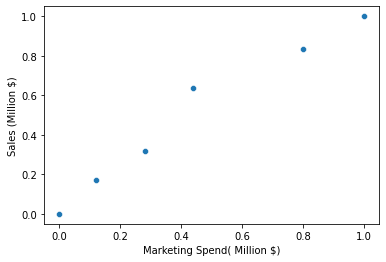

In [6]:
# Plotting a scatter plot
sns.scatterplot( data = data , x = 'Marketing Spend( Million $)' , y = 'Sales (Million $)')

Build the Linear Regression Model

In [7]:
# Read in the data
X = data['Marketing Spend( Million $)'].values.reshape(-1,1)
y = data['Sales (Million $)']

In [8]:
reg = LinearRegression() 
reg.fit(X,y)

LinearRegression()

In [9]:
# Predictions on the basis of the model
y_pred = reg.predict(X)
y_pred

array([0.05907859, 0.17743302, 0.33523892, 0.49304482, 0.8481081 ,
       1.04536548])

In [10]:
r2_score(y, y_pred) # Marketing spends account for 96.5% of the variation present in the Sales

0.9652190930694494

In [11]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y - y_pred))
print(rss)
mse = mean_squared_error(y, y_pred)
print(mse)
# Root Mean Squared Error
rmse = mse**0.5
print(rmse)

0.02680830738175687
0.0044680512302928115
0.06684348308019872


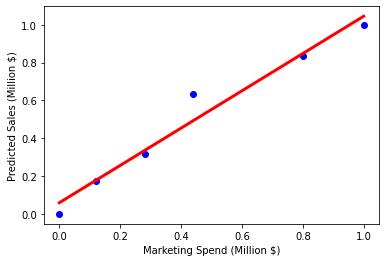

In [12]:
# Plot for Predicted sales vs Marketing Spend
plt.scatter( X , y , color = 'blue') # original data shown as blue points
plt.plot(X , y_pred , color = 'red' , linewidth = 3) # Fitted model in red
plt.xlabel("Marketing Spend (Million $)")
plt.ylabel("Predicted Sales (Million $)")
plt.show()

Let us say that we want a better fit and hence we use higher degree polynomials as predictors. 

In [13]:
#help(PolynomialFeatures)
X = data['Marketing Spend( Million $)'].values.reshape(-1,1)
print(X)

[[0.  ]
 [0.12]
 [0.28]
 [0.44]
 [0.8 ]
 [1.  ]]


In [14]:
poly = PolynomialFeatures(3) # Want to generate features with degree less than or equal to
                             # the specified degree
Y = poly.fit_transform(X) # Transform the variable X to 1, X, X^2, X^3
print(Y)

[[1.       0.       0.       0.      ]
 [1.       0.12     0.0144   0.001728]
 [1.       0.28     0.0784   0.021952]
 [1.       0.44     0.1936   0.085184]
 [1.       0.8      0.64     0.512   ]
 [1.       1.       1.       1.      ]]


In [15]:
# Building the polynomial regression model with degree 5
degree=5 # got this number through trial and this is the lowest value which fit the data perfectly
polyreg5 = PolynomialFeatures(degree)
X_poly5 = polyreg5.fit_transform(X) # Transform the variable X to 1, X, X^2, X^3, X^4, X^5
linreg5 = LinearRegression()
linreg5.fit(X_poly5, y)

LinearRegression()

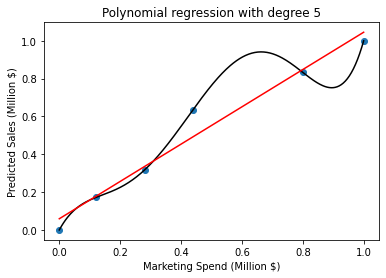

In [16]:
# Plotting the polynomial regression(degree-5) and simple linear regression
X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1) # Between 0 and 1 we get 300 equally spaced values
# print(X_seq)
plt.figure()
plt.scatter(X,y) 
plt.plot(X_seq,linreg5.predict(polyreg5.fit_transform(X_seq)),color="black") # model fit with polynomial regression
plt.plot(X_seq,reg.predict(X_seq),color="red") # model fit with linear regression
plt.title("Polynomial regression with degree "+str(degree))
plt.xlabel("Marketing Spend (Million $)")
plt.ylabel("Predicted Sales (Million $)")
plt.show()

In [17]:
y_pred5 = linreg5.predict(polyreg5.fit_transform(X)) # store predictions from the polynomial regression in the variable y_pred5
print(r2_score(y, y_pred5))

1.0


In [18]:
# Metrics to assess model performance
rss = np.sum(np.square(y - y_pred5))
print(rss)
mse = mean_squared_error(y, y_pred5)
print(mse)
rmse = mse**0.5
# Root Mean Squared Error
print(rmse)

1.3805759176147686e-28
2.300959862691281e-29
4.796832144959089e-15


### Ridge Regression

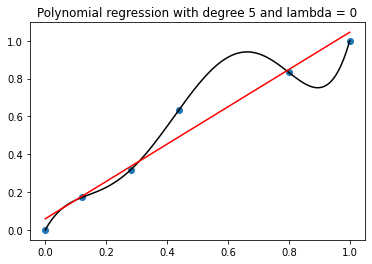

r2 score = 1.0
[  0.           2.94295226 -19.85351777  71.18543313 -95.27426562
  41.99939801]


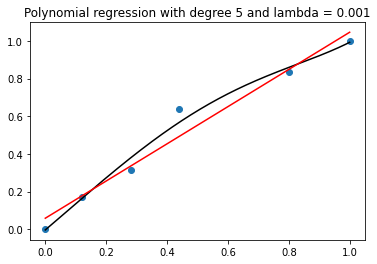

r2 score = 0.9877944050899673
[ 0.          1.3870223   0.12292763 -0.68649391 -0.38094524  0.55241207]


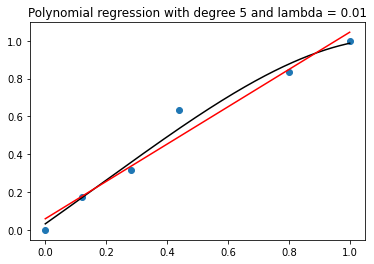

r2 score = 0.9809539612050425
[ 0.          1.13560973  0.13020587 -0.17959473 -0.14842149  0.01704645]


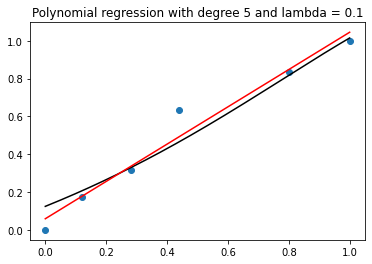

r2 score = 0.9396437428481395
[ 0.          0.65027964  0.2651751   0.07110798 -0.02396289 -0.07201942]


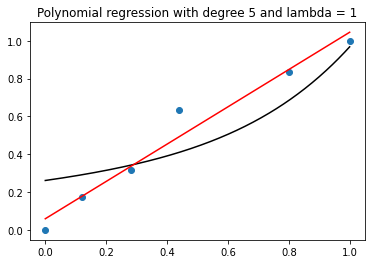

r2 score = 0.7953946450161844
[0.         0.22867197 0.16688081 0.12627838 0.10086186 0.08408679]


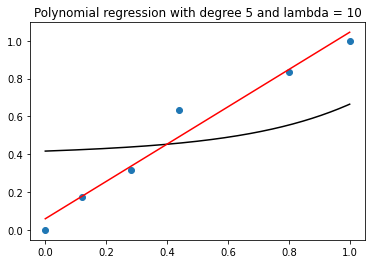

r2 score = 0.3849505189364377
[0.         0.0571764  0.05346191 0.0489761  0.04550657 0.04291024]


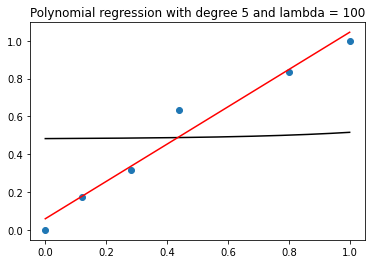

r2 score = 0.058590880289601355
[0.         0.00729918 0.00707285 0.00662207 0.00624288 0.00594789]


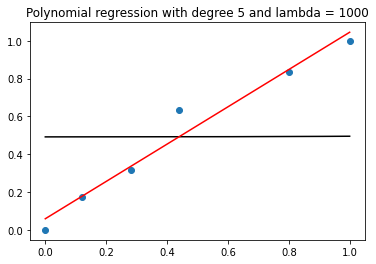

r2 score = 0.006166338591997
[0.         0.00075179 0.0007312  0.00068611 0.00064776 0.00061778]


In [19]:
# Applying Ridge Regression with varying the hyperparameter 'lambda'

X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1) # values to be considered for predictor variable
lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000] # Higher the value of lambda, 
                                                  # more the regularization
for i in lambdas: # for each lambda we get different model coefficients
    degree = 5 # Degree for polynomial regression - chose 5 since this is the lowest number that gave a perfect fit
    # Creating degree 5 features
    ridgecoef = PolynomialFeatures(degree)
    # Transforming input features to polynomial features (1, x1, x2, x3, x4, x5)    
    X_poly = ridgecoef.fit_transform(X)
    ridgereg = Ridge(alpha = i) # Initialize the Ridge Regression model with a specific lambda
    ridgereg.fit(X_poly, y) # fit the model on the polynomial features
    
    # Plotting the ridge regression model for each lambda
    plt.figure()
    plt.scatter(X,y)
    plt.plot(X_seq,ridgereg.predict(ridgecoef.fit_transform(X_seq)),color="black") # Polynomial Regression
    plt.plot(X_seq,reg.predict(X_seq),color="red") # Linear Regression
    plt.title("Polynomial regression with degree "+str(degree) + " and lambda = " + str(i))
    plt.show()
    
    #Computing the r2 score
    y_pred = ridgereg.predict(ridgecoef.fit_transform(X))
    print("r2 score = " + str(r2_score(y, y_pred))) 
    print(ridgereg.coef_) # model coefficients


### Lasso Regression

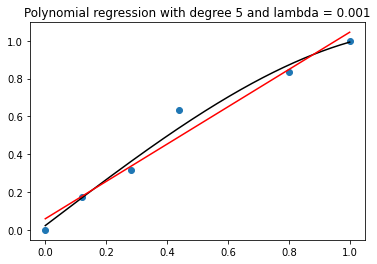

r2 score = 0.9826605659196855
[ 0.          1.22414556 -0.         -0.25396979 -0.         -0.        ]


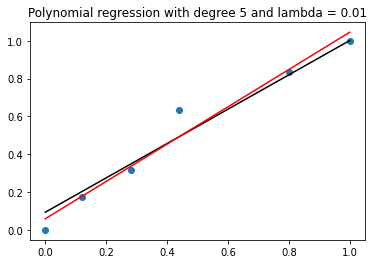

r2 score = 0.9591121182494984
[0.       0.907835 0.       0.       0.       0.      ]


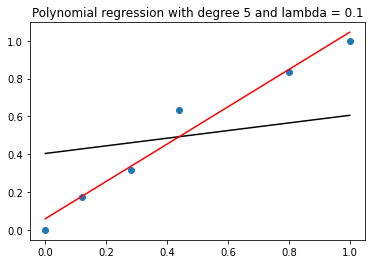

r2 score = 0.3545216110743441
[0.         0.20176806 0.         0.         0.         0.        ]


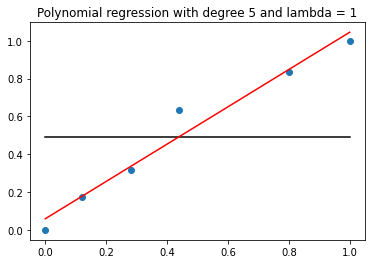

r2 score = 0.0
[0. 0. 0. 0. 0. 0.]


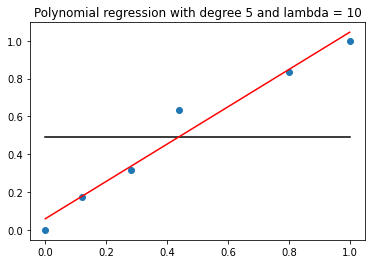

r2 score = 0.0
[0. 0. 0. 0. 0. 0.]


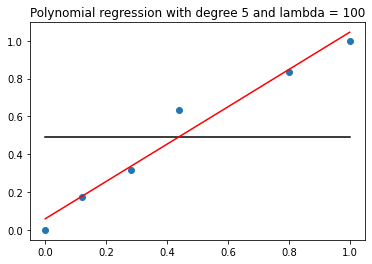

r2 score = 0.0
[0. 0. 0. 0. 0. 0.]


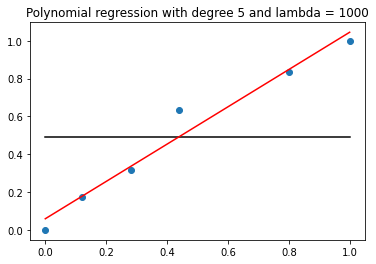

r2 score = 0.0
[0. 0. 0. 0. 0. 0.]


In [20]:
# Applying Lasso Regression with varying the hyperparameter 'lambda'

lambdas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in lambdas:
    degree = 5
    # Creating degree 5 features
    lassocoef = PolynomialFeatures(degree)
    # Transforming input features to polynomial features (1, x1, x2, x3, x4, x5)
    X_poly = lassocoef.fit_transform(X)
    lassoreg = Lasso(alpha = i)
    lassoreg.fit(X_poly, y)
    # Plotting the ridge model
    plt.figure()
    plt.scatter(X,y)
    plt.plot(X_seq,lassoreg.predict(lassocoef.fit_transform(X_seq)),color="black")
    plt.plot(X_seq,reg.predict(X_seq),color="red")
    plt.title("Polynomial regression with degree "+str(degree) + " and lambda = " + str(i))
    plt.show()
    # Compute R^2 
    y_pred = lassoreg.predict(lassocoef.fit_transform(X))
    print("r2 score = " + str(r2_score(y, y_pred)))
    print(lassoreg.coef_)

### Ridge and Lasso Regression for specific lambda value

In [21]:
# Get the model coefficients for specific lambda say 0.001

# Ridge Regression

ridgecoef = PolynomialFeatures(degree, include_bias = True) # Creating degree 5 features
# Transforming input features to polynomial features (1, x1, x2, x3, x4, x5)    
X_poly = ridgecoef.fit_transform(X)
ridgereg = Ridge(alpha = 0.001) # Initialize the Ridge Regression model with a specific lambda
ridgereg.fit(X_poly, y) # fit the model on the polynomial features
print(ridgereg.coef_)    
y_pred = ridgereg.predict(ridgecoef.fit_transform(X))
print("r2 score = " + str(r2_score(y, y_pred)))

# Lasso Regression
lassocoef = PolynomialFeatures(degree) # Creating degree 5 features
# Transforming input features to polynomial features (1, x1, x2, x3, x4, x5)
X_poly = lassocoef.fit_transform(X)
lassoreg = Lasso(alpha = 0.001)
lassoreg.fit(X_poly, y)
print(lassoreg.coef_)
y_pred = lassoreg.predict(lassocoef.fit_transform(X))
print("r2 score = " + str(r2_score(y, y_pred)))

[ 0.          1.3870223   0.12292763 -0.68649391 -0.38094524  0.55241207]
r2 score = 0.9877944050899673
[ 0.          1.22414556 -0.         -0.25396979 -0.         -0.        ]
r2 score = 0.9826605659196855


In [22]:
betas = pd.DataFrame(index=['1', 'x', 'x2', 'x3', 'x4', 'x5'], 
                     columns = ['Polynomial', 'Ridge', 'Lasso'])
betas['Polynomial'] = linreg5.coef_ # Polynomial Regression
betas['Ridge'] = ridgereg.coef_ # Ridge Regression
betas['Lasso'] = lassoreg.coef_ # Lasso Regression
betas

,Polynomial,Ridge,Lasso
1,0.000000,0.000000,0.000000
x,2.942952,1.387022,1.224146
x2,-19.853518,0.122928,-0.000000
x3,71.185433,-0.686494,-0.253970
x4,-95.274266,-0.380945,-0.000000
x5,41.999398,0.552412,-0.000000
